## Text pre-processor class


In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import spacy
import nltk
import re
nlp = spacy.load('en_core_web_sm')


In [17]:

class PreProcessor():

    nlp = spacy.load('en_core_web_sm')    

    def __init__(self, descriptions : List[List[str]]):

        self.descriptions = descriptions
        self.corpus = []

    def lowercaser(self, text : List[str]) -> str:
        return text[0].lower().replace("'", "")
    
    def special_character_remover(self, text :str) -> str:

        # Removes ulrs and numbers in the text
        url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        clean_text = re.sub(url_pattern, '', text)
        clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)  
        return clean_text 
        
    def tokenizer(self , text : str) -> List[str]:

        tokens = word_tokenize(text)
        return(tokens)

    def stopwords_remover (self,  text : List[str]) -> List[str] :

        stop_words = set(stopwords.words('english'))

        tokens = [word for word in text if word not in stop_words]
        # removed = [word for word in text if word in stop_words]
        return " ".join(tokens)


    def stem_text(self, text: List[str]) -> List[str] :
            
        doc = nlp(' '.join(text))

        stemmer = PorterStemmer()
        
        stemmed_tokens = [stemmer.stem(token.text) for token in doc if token.is_alpha]
        
        return stemmed_tokens
    
    def lemmatizer(self , list_of_tokens : List[str]) -> str:
    
        lemmatized_tokens_list = []
        
        for token in list_of_tokens: 
            token = WordNetLemmatizer().lemmatize(token)
            lemmatized_tokens_list.append(token)
            
        return " ".join(lemmatized_tokens_list)

    
    def corpus_creater (self) -> List[List[str]]:

        for description in self.descriptions:
            cleaned =   self.stopwords_remover(\
                        self.tokenizer(\
                        self.special_character_remover(\
                        self.lowercaser(description)
                                      )))
            self.corpus.append(cleaned)

        return self.corpus

    def visualizer(self):

        text = " ".join(self.corpus)
        wordcloud = WordCloud(
            width=2048, 
            height=2048, 
            background_color='#edede9', 
            mode='RGBA',
            max_words=200, 
            colormap='rainbow', 
            # contour_color='blue', 
            # contour_width=0.5,                 
        ).generate(text)
        plt.figure(figsize=(15,15))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        

In [18]:

input_text = [["The story begins with Hannah's brother, a young Jewish teen, as she is completing her senior year of high school. Her small neighborhood in Brooklyn is falling apart and SING! is one of the only traditions keeping the neighborhood alive. Newly arrived teacher, Miss Lombardo grew up in the neighborhood but returned to be their Sing Leader. One cold Christmas night, Miss Lombardo is leaving a neighborhood party when a young man hails her a cab, then attempts to mug her. In self defense, she bites his hand to release his grip and he screams in pain and terror, quickly making an exit. The cab driver jokes about not starting the meter yet. On the first day of school, Miss Lombardo runs into difficulty when her students are uninterested and misbehaved. One such student was named Dominic who gets scolded for bringing stolen watches to school grounds and putting his feet up on the desk. On the day of Sing Leader elections, Miss Lombardo recognizes Dominic as her mugger by the bandage on his hand and decides to blackmail him into being co-Sing Leader of the Senior class along with Hannah, who was rightfully elected. The school kids work hard to plan their Sing productions. Hannah and Dominic clash along the way as Hannah uses traditional Sing planning strategies while Dominic wants to introduce the flavor of the youth in the neighborhood. In order to put Dominic and Hannah on the same page, Miss Lombardo suggests that Hannah accompany Dominic to a local club. At first, the two are equally hesitant but Hannah agrees on the terms that it is not a date. However, by the end of the night, Hannah uses Dominic to make her ex boyfriend, Mickey, jealous, and due to this, Hannah and Dominic start seeing each other in a different light. Dominic accompanies Hannah on her walk home and the two share a romantic kiss. Once the two are finally uniting and getting along, the Dept. of Education informs the school that it will close its doors forever at the end of this semester and therefore, there will not be enough resources for them to complete this year's Sing. This fuels the kids to work even harder on their productions and the neighborhood comes together even more to help finance the show, despite the school authorities' ban. Ironically, just as things are starting to look up, Dominic reluctantly accompanies his brother on a robbery of Hannah's mother's diner, their sole source of income which already was at risk of failure due to the school's upcoming closure. A classmate saw Dominic standing outside the diner at the time of the crime and informed Hannah of what he saw. Devastated, Hannah confronts Dominic and he promises to get the money back for her. He then steals the money back from his brother and returns it to the diner, restoring Hannah's faith in him. The recent events had discouraged Dominic from fulfilling his co-Sing leader duties and he had been skipping out on rehearsals. In a moment of great need as the senior's main performer falls unconscious, Dominic steps in to save the show. He sheds his bad-boy demeanor and exceeds all expectations. The underclassmen and seniors perform to a record-high sold out audience. At the end of the show, Hannah makes a moving speech motivating the community to rejoice and always remember that despite compromising circumstances, they completed a successful Sing and proved their community's worth."],\
              ["Set in a lonely city on a rainy night, the film takes place in a bicycle shop  that is closed for the night. In the corner of the shop sleeps Red, a red unicycle who languishes in the clearance corner, waiting to be purchased. As the camera zooms on him, the sound of rain falling turns into a drumroll, and we go into the dream-sequence. In his dream, Red is being ridden by a circus clown  as part of a juggling act. The clown enters the ring, accompanied by a fanfare, expecting a huge applause, but instead receives only a few scattered claps from different parts of the  audience. Nevertheless, Lumpy starts juggling three balls whilst riding Red, occasionally dropping them as he does. However, Red slides out from underneath Lumpy  and spikes the balls back to him with his bike pedals. The confused clown ponders this for only a second before continuing on with his act. At this point, Red is forced to catch another ball which Lumpy unintentionally throws across the ring. Lumpy continues to ride in the air while juggling the other two balls while Red bounces the green ball up and down. Eventually Lumpy comes to a sudden realization, and looks between his legs, only to discover he's been riding on nothing before he falls to the ground . Red catches the other two balls and begins juggling all three of them, and then balances them on top of each other, after which he receives an uproarous applause. But then the sound of clapping turns into the sound of rain, and Red awakens, left to face bleak reality. Depressed, he returns to the corner where he was previously resting, and goes back to sleep. The short ends with the final image of the neon sign for Eben's Bikes."],
              ["The president is on his way to give a speech. While he is traveling there a man shows up with a camera. A reporter tries to ask a member of the secret service a question. When the president enters he is shot by the man with the camera. The president's main bodyguard, Alex Thomas , is grazed by the bullet that hits the president. The shooter is gunned down by Alex and other secret service agents. The president dies at the hospital. Kate Crawford , an investigative journalist, starts asking questions about the assassination. Anyone she questions is killed. She goes to Alex Thomas's house to tell him what is happening. As they head to his boat, Thomas sees some men hiding in the bushes. He throws Kate into the water and dives in. Thomas jumps out of the water to kill two of the hitmen while a third hitman drives off to inform his boss what happened. They are able to link the hitmen to a man called Jack Baldwin . Agent Thomas and other Secret Service members attack the location of Jack Baldwin. Baldwin escapes but is later caught by Thomas. Thomas and Crawford are suspicious of Vaughan Stevens , Agent Thomas's boss, who had previous links to Baldwin. While reviewing film of the assassination at his house, Thomas discovers that Stevens handed the assassin a gun during the president's entrance. Thomas leaves to find Stevens while Kate stays at his house. When Thomas arrives at Stevens' home he finds him dead. Before entering, Thomas sees a car leaving the house. He then receives a call that Baldwin has escaped. Kate is attacked by Baldwin but Thomas arrives and kills Baldwin. Thomas arrives at the first lady's  home to see the car that left Steven's house pulling away. Thomas discovers that the first lady wanted her husband killed - due to the fact that the President was being unfaithful to her. A few weeks later Kate and Thomas have dinner. Thomas says that he still doesn't know who wanted the President dead."],              
              ['A wife s husband is cheating on her. She decides to go on a road trip with her husband s other woman. While driving the two women pick up a hitchhiker. The man they pick up may be a robber and murderer on the run from the cops. A policeman who is tracking the hitchhiker has a close eye on them, but the question is why?http://www.imdb.com/title/tt0112515']
              ]

pp = PreProcessor(input_text)
corrpus = pp.corpus_creater()
corrpus

['story begins hannahs brother young jewish teen completing senior year high school small neighborhood brooklyn falling apart sing one traditions keeping neighborhood alive newly arrived teacher miss lombardo grew neighborhood returned sing leader one cold christmas night miss lombardo leaving neighborhood party young man hails cab attempts mug self defense bites hand release grip screams pain terror quickly making exit cab driver jokes starting meter yet first day school miss lombardo runs difficulty students uninterested misbehaved one student named dominic gets scolded bringing stolen watches school grounds putting feet desk day sing leader elections miss lombardo recognizes dominic mugger bandage hand decides blackmail cosing leader senior class along hannah rightfully elected school kids work hard plan sing productions hannah dominic clash along way hannah uses traditional sing planning strategies dominic wants introduce flavor youth neighborhood order put dominic hannah page miss

In [19]:

from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
genres = [
#  ['Drama'],
 ['Drama', 'Horror', 'Thriller'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Comedy', 'Drama', 'Horror', 'Thriller'],
 ['Comedy', 'Drama','Children', 'Horror', 'Thriller']]

multilabel_binarizer.fit(genres)

# transform target variable
y = multilabel_binarizer.transform(genres)
print(y)

[[0 0 1 1 1]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 1 1]
 [1 1 1 1 1]]


In [20]:
multilabel_binarizer.inverse_transform(y[[0]])

[('Drama', 'Horror', 'Thriller')]

### BERT model for creating embeddings

In [22]:
# import torch
# from transformers import BertTokenizer, BertModel

# # Example data
# text = "Set in a lonely city on a rainy night, the film takes place in a bicycle shop  that is closed for the night. In the corner of the shop sleeps Red, a red unicycle who languishes in the clearance corner, waiting to be purchased. As the camera zooms on him, the sound of rain falling turns into a drumroll, and we go into the dream-sequence. In his dream, Red is being ridden by a circus clown  as part of a juggling act. The clown enters the ring, accompanied by a fanfare, expecting a huge applause, but instead receives only a few scattered claps from different parts of the  audience. Nevertheless, Lumpy starts juggling three balls whilst riding Red, occasionally dropping them as he does. However, Red slides out from underneath Lumpy  and spikes the balls back to him with his bike pedals. The confused clown ponders this for only a second before continuing on with his act. At this point, Red is forced to catch another ball which Lumpy unintentionally throws across the ring. Lumpy continues to ride in the air while juggling the other two balls while Red bounces the green ball up and down. Eventually Lumpy comes to a sudden realization, and looks between his legs, only to discover he's been riding on nothing before he falls to the ground . Red catches the other two balls and begins juggling all three of them, and then balances them on top of each other, after which he receives an uproarous applause. But then the sound of clapping turns into the sound of rain, and Red awakens, left to face bleak reality. Depressed, he returns to the corner where he was previously resting, and goes back to sleep. The short ends with the final image of the neon sign for Eben's Bikes."

# # Load BERT tokenizer and model
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertModel.from_pretrained('bert-base-uncased')

# # Tokenize input text and get BERT embeddings
# inputs = tokenizer(text, return_tensors='pt')
# outputs = model(**inputs)


In [23]:
# x = outputs.last_hidden_state.detach().numpy()
# x.shape

In [21]:

df = pd.read_csv('../Dataset_MovieSummaries/Dataset.csv')
df = df.drop(columns=['Unnamed: 0','movie_id','movie_name'])

In [22]:
df['summary']

0        Homicide detective Nate Burns  once lived a to...
1        James Rainwood  is a model citizen. He is happ...
2        A disillusioned and borderline psychotic LAPD ...
3        Dean, a young hood, and his wife take their di...
4        A Fleet Street reporter  investigates the clai...
                               ...                        
13409    Prem ([[Arbaaz Khan  is married to Sheetal  an...
13410    Datho  has been innocent in prison for many ye...
13411    Emotionally devastated by the death of his unc...
13412    Ulises arrives in a coastal town near Valencia...
13413    Priya Amal Raj  loses her mother at a very you...
Name: summary, Length: 13414, dtype: object

### Processing the movie descriptions, creating corpus

In [23]:
%%time
summaries = [[summary] for summary in df['summary']]
processor = PreProcessor(summaries)
cleaned_summaries = processor.corpus_creater()

CPU times: user 11.5 s, sys: 222 ms, total: 11.8 s
Wall time: 11.9 s


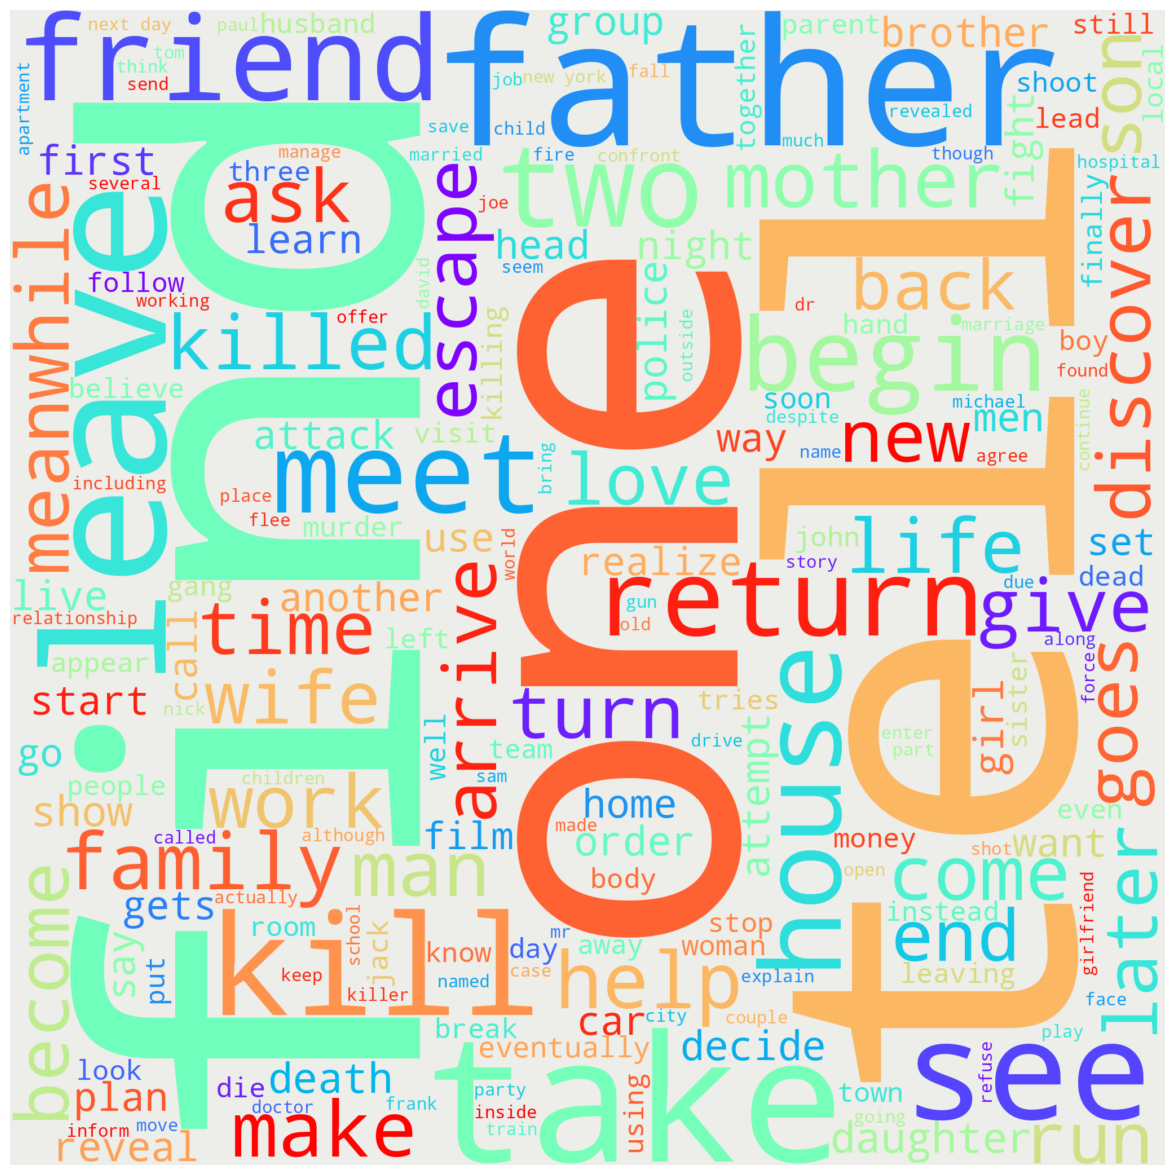

In [24]:
processor.visualizer()

In [25]:
# Replacing with processed summary
df['summary'] = cleaned_summaries

In [26]:
X = df['summary']
Y = df.loc[:, df.columns != 'summary']
X

0        homicide detective nate burns lived tough life...
1        james rainwood model citizen happily married b...
2        disillusioned borderline psychotic lapd vice d...
3        dean young hood wife take disturbed young son ...
4        fleet street reporter investigates claim dr be...
                               ...                        
13409    prem arbaaz khan married sheetal lovely daught...
13410    datho innocent prison many years comes home no...
13411    emotionally devastated death uncle boston carp...
13412    ulises arrives coastal town near valencia teac...
13413    priya amal raj loses mother young age friendly...
Name: summary, Length: 13414, dtype: object

In [27]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)

tfidf = TfidfVectorizer(max_features=1000, min_df=20, ngram_range=(1,3))

tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# pickle tfidf model for later use
joblib.dump(tfidf, '../models/my_tfidf_min20.pkl')


CPU times: user 15.2 s, sys: 529 ms, total: 15.7 s
Wall time: 15.9 s


['../models/my_tfidf_min20.pkl']

In [28]:
X_train_tfidf


<10731x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 688475 stored elements in Compressed Sparse Row format>

In [29]:
X_test_tfidf

<2683x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 175326 stored elements in Compressed Sparse Row format>

In [30]:
%%time
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray())
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_tfidf_df.to_csv('../Dataset_MovieSummaries/X_train1.csv')
X_test_tfidf_df.to_csv('../Dataset_MovieSummaries/X_test1.csv')
y_train_df.to_csv('../Dataset_MovieSummaries/y_train1.csv', header=True)
y_test_df.to_csv('../Dataset_MovieSummaries/y_test1.csv', header=True)

CPU times: user 3.65 s, sys: 119 ms, total: 3.77 s
Wall time: 3.82 s
